# Housing price prediction

This notebook presents a Machine Learning (ML) exercise that predicts housing prices of properties in California. The dataset  is taken from https://www.kaggle.com/code/crbelhekar619/california-housing-price-prediction-tutorial/data. Alternatively, the California housing data can be fetched by doing    

    from sklearn.datasets import fetch_california_housing


# Table of Contents
1. [Data inspection](#Data-inspection)    
    1.1 [Data cleaning](#Data-cleaning)    
    1.2 [Data correlation](#Data-correlation)    
2. [Training](#Training)     
    2.1 [Linear regression](#Linear-regression)     
    2.2 [Random forest](#Random-forest)
3. [Result and discussion](#Result-and-discussion)

In [101]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [17]:
pd.__version__

'1.5.2'

## Data inspection
Getting some insights to the data to understand each feature and see if there are any problems.

In [5]:
# load the dataset
housing = pd.read_csv('data/california-housing-prices/housing.csv')
housing.shape

(20640, 10)

The data has 20640 entries (i.e. rows) with 10 different parameters (i.e. features). 

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note that`total_bedrooms`has **20433** entries, which means that 207 datapoints are missing from that column. 

In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


No zeros in any of the numerical features as seen from the minimum value of each column. Note that longtitude 0 is the prime meridian, which is not where California is located on. 

As for`ocean_proximity`, which is non-numerical, here are the unique values:

In [20]:
pd.unique(housing['ocean_proximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Let's clone the dataset and work on the numerical features first.

In [31]:
# make a copy of the housing data
data = pd.DataFrame(housing)

In [32]:
# we work on 'data' from here on
# drop all non-numerical feature(s)
data.drop('ocean_proximity', axis=1, inplace=True)

In [33]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


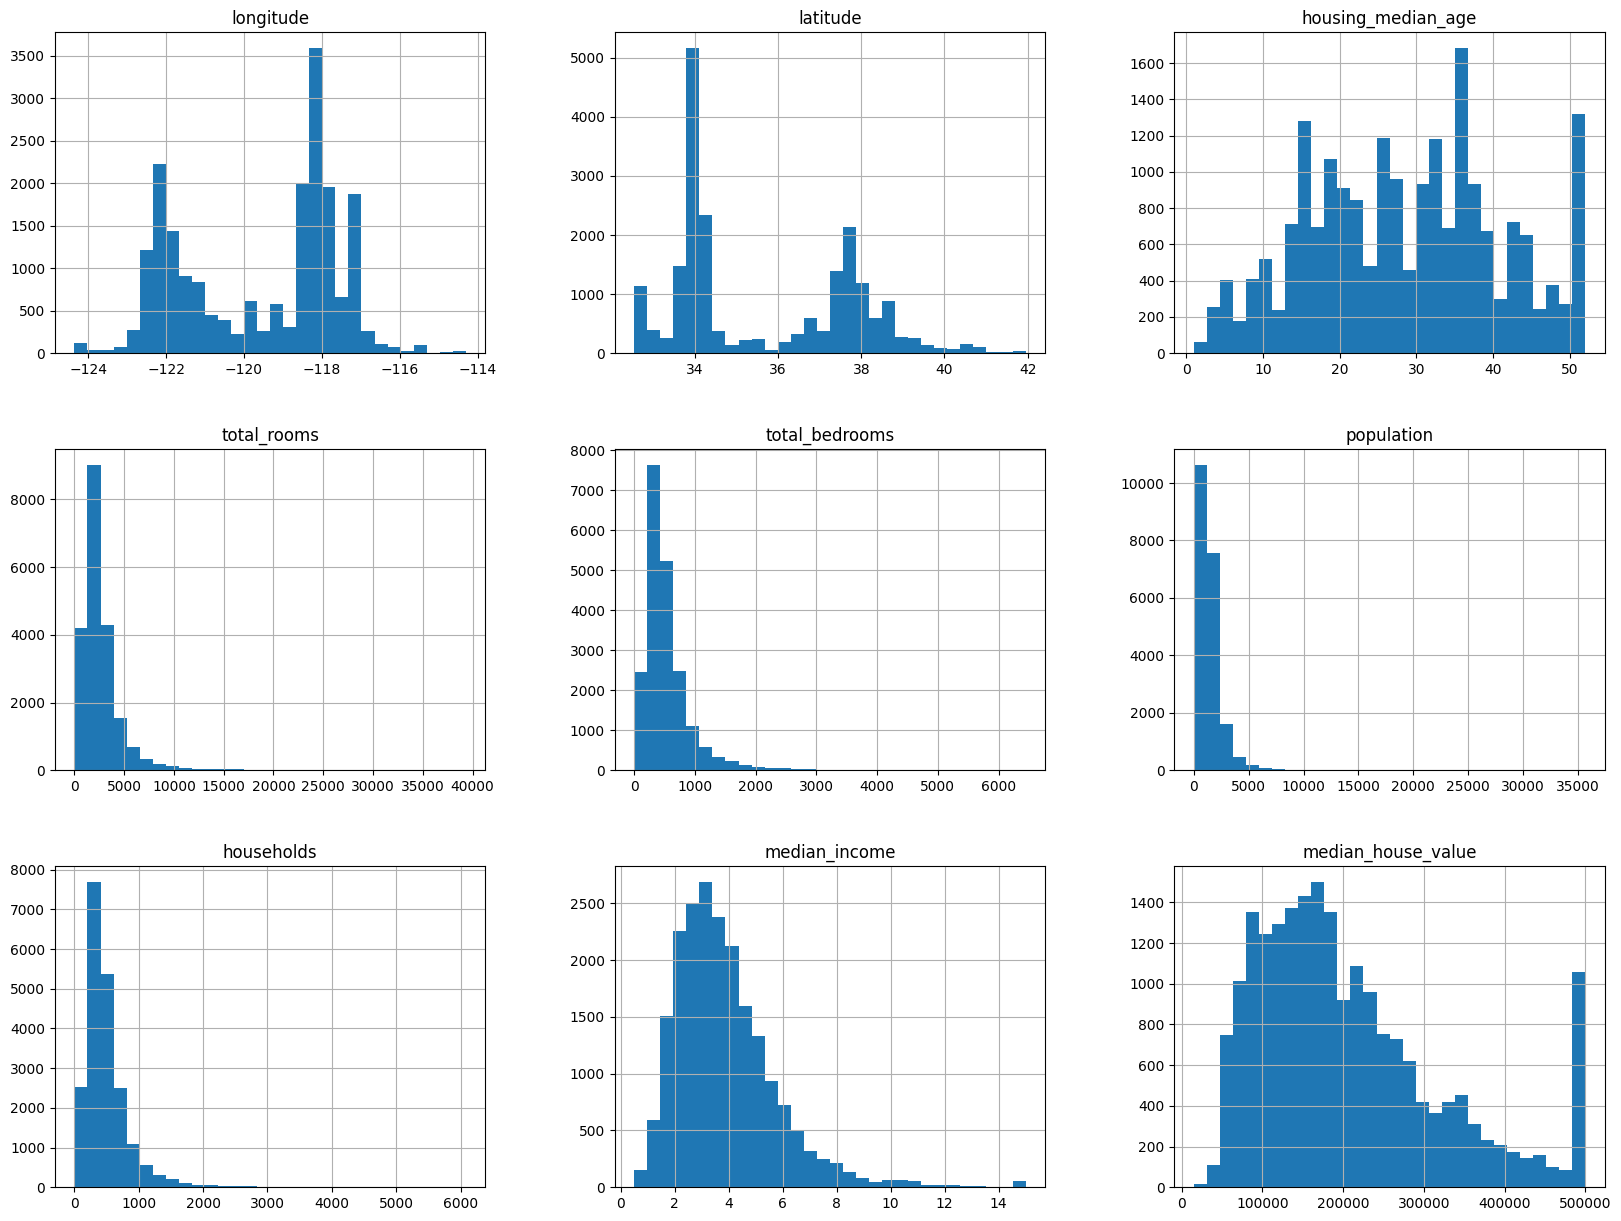

In [38]:
# plot histograms of all features
data.hist(bins=30, figsize=(20,15))
plt.show()

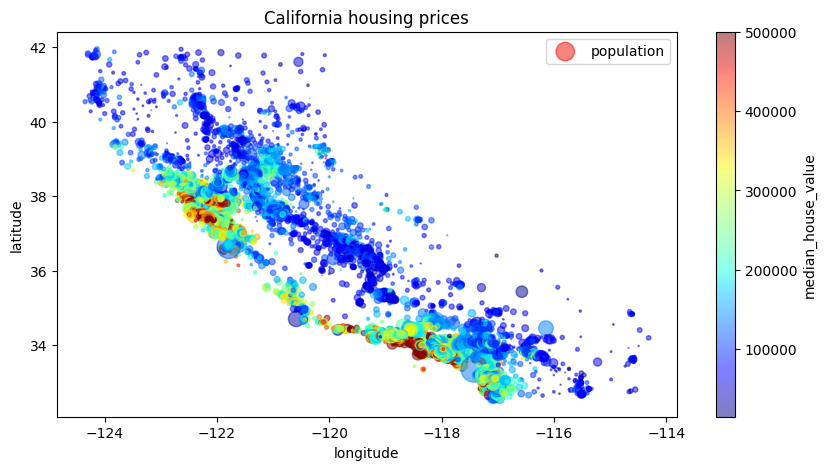

In [47]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=housing["population"]/100, label="population", figsize=(10,5),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California housing prices')
plt.legend()

The housing is more populated along the ocean line. 

### Data cleaning
The missing entries in`total_bedrooms`can be treated by either:     
- droping the row with NaN     
- fill the NaN with the mean value

Here, the NaN entries will simply get removed. 

In [50]:
# show the NaN entries
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0
...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0


In [51]:
data.dropna(inplace=True)

In [53]:
data[data.isnull().any(axis=1)]
# this should show no entires with NaN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


### Data correlation
The corelation of features is inspected. This is done by plotting a correlation matrix of all numerical features. Note that if there are non-numerical parameters in the dataset, the numerical parameters will still be automatically selected to make this matrix.

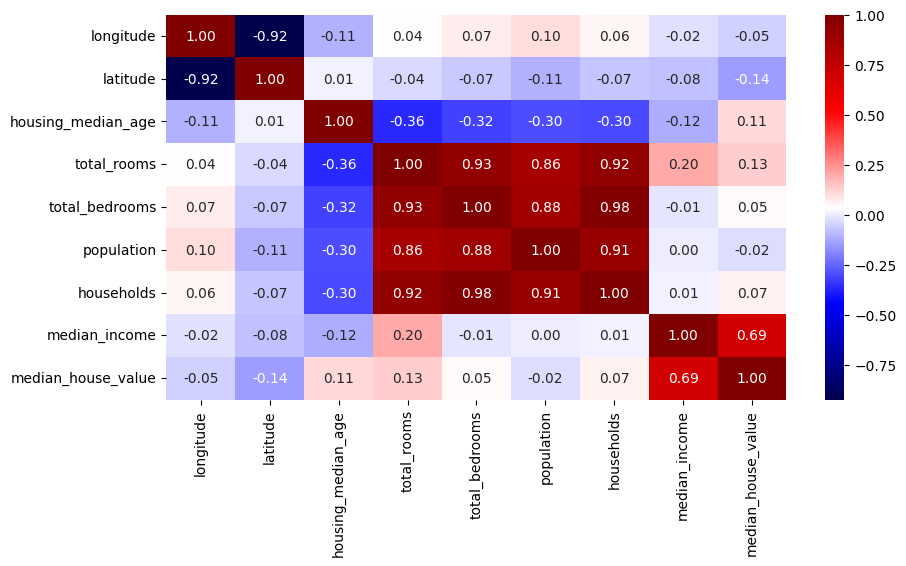

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='seismic')
plt.show()

There is a strong correlation between`median_income` and `median_house_value`. The correlation is positive as confirmed by the plot below, where the edian house value increases when the median income increases. The maximum value of the median house price is 500K.  

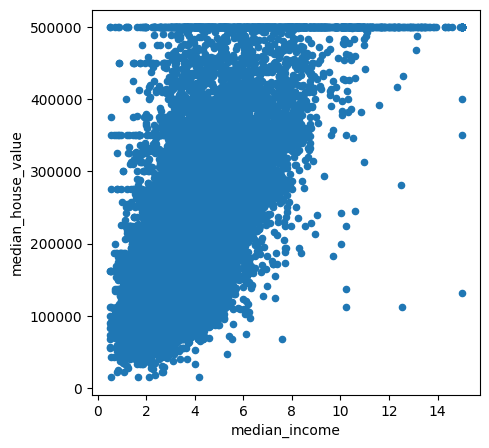

In [44]:
data.plot.scatter(y='median_house_value',x='median_income', figsize=(5,5), alpha=1)
plt.show()

## Training

In [83]:
# splitting data for training
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

# 80% of data for training and 20% for testing 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=4)

### Linear regression

In [84]:
model_LR = LinearRegression()  
model_LR.fit(X_train, Y_train)

LinearRegression()

In [85]:
# apply the model to the test data
Y_pred_LR = model_LR.predict(X_test)

In [93]:
# compare the predicted value with the actual price
#df_comp_LR = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred_LR.flatten()})
df_comp_LR = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_LR})
df_comp_LR

,Actual,Predicted
13167,216000.0,235297.045988
17566,180800.0,219463.520327
19593,86200.0,123991.064732
13825,64800.0,77252.150248
19554,54100.0,85175.545584
...,...,...
16630,183200.0,234796.630257
17317,215200.0,287031.864563
10796,500001.0,439190.530690
8650,368400.0,344489.738710


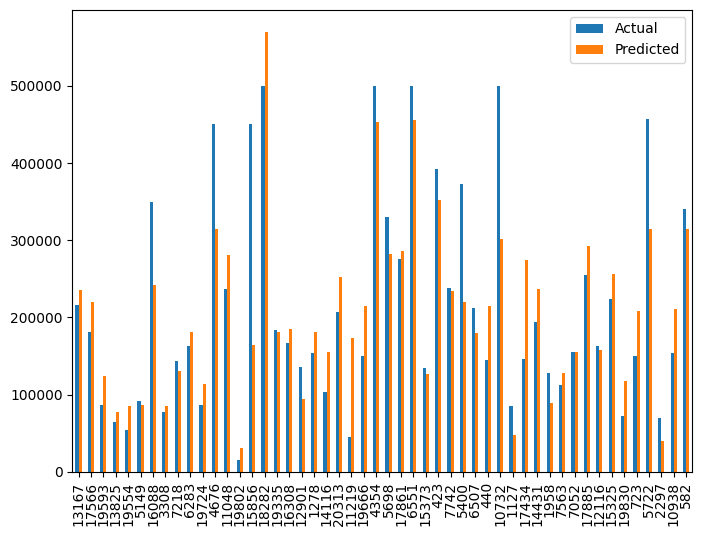

In [94]:
df_comp_LR.head(50).plot(kind='bar',figsize=(8,6))
plt.show()

<AxesSubplot: xlabel='Actual', ylabel='Predicted'>

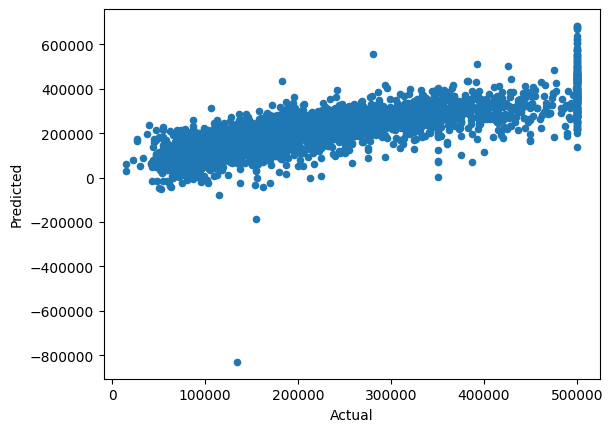

In [99]:
df_comp_LR.plot.scatter(x='Actual', y='Predicted')

In [95]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(Y_test, Y_pred_LR))

Mean Absolute Percentage Error: 0.3118402802559274


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_LR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_LR)))

Mean Absolute Error: 51888.16073017458
Mean Squared Error: 5090278671.184318
Root Mean Squared Error: 71346.18890441392


### Random forest

In [102]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, Y_train)
Y_pred_RF = model_RF.predict(X_test)

In [103]:
# compare the predicted value with the actual price
df_comp_RF = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_RF})
df_comp_RF

,Actual,Predicted
13167,216000.0,245940.00
17566,180800.0,232808.00
19593,86200.0,96963.00
13825,64800.0,97773.99
19554,54100.0,68239.00
...,...,...
16630,183200.0,199745.00
17317,215200.0,261745.03
10796,500001.0,478356.70
8650,368400.0,386325.08


<AxesSubplot: xlabel='Actual', ylabel='Predicted'>

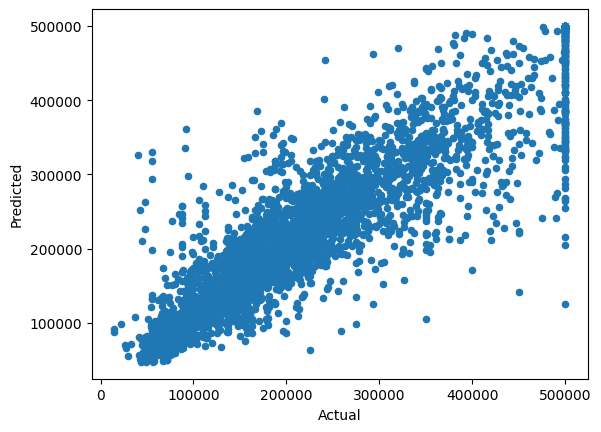

In [104]:
df_comp_RF.plot.scatter(x='Actual', y='Predicted')

In [105]:
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(Y_test, Y_pred_RF))

Mean Absolute Percentage Error: 0.18657917479916625


In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RF)))

Mean Absolute Error: 33037.36169317348
Mean Squared Error: 2583167976.6390185
Root Mean Squared Error: 50824.875569341224


## Result and discussion

The housing price prediction using the linear regression model results the mean abslute percentage error of 0.31, while the prediction with random forest gives the error of 0.19. This implies that the random forest model performs better. 

There are some negative prices predicted by linear regression, while random forest only predicts positive value. This may be due to overfitting and could be improved with a larger dataset or applying some penalty (i.e. doing ridge regression instead).